# Neural Network

## Neural Network From Scratch With Numpy



In [1]:
!pip install future
!pip install pandas
!pip install torchvision

^C
^C
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spinners import open_spinner
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/spinners.py", line 9, in <module>
    from pip._internal.utils.logging import get_indentation
  File "/usr/local/lib/python3.10/dist-packages/pip/_interna

In [3]:
# import sys
# sys.path.append(GOOGLE_DRIVE_PATH)


In [4]:
from utils.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from utils.data import get_MNIST_data, get_normalized_MNIST_data, get_california_housing_data, get_california_housing_normalized__data
from builtins import range
import numpy as np
import matplotlib.pyplot as plt
from utils.solver import *
import pandas as pd
from sklearn.datasets import fetch_california_housing


# from data import get_MNIST_data, get_normalized_MNIST_data, get_california_housing_data, get_california_housing_normalized__data
# from gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
# from solver import *



%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

def print_mean_std(x,axis=0):
    print(f"  means: {x.mean(axis=axis)}")
    print(f"  stds:  {x.std(axis=axis)}\n")

# Affine layer: forward
Implement the `affine_forward` function.

In [5]:
def affine_forward(x, w, b):

    x1=x.reshape(x.shape[0],-1)
    out=np.dot(x1,w) + b
    cache=(x,w,b ,out)

    return out, cache


You can test your implementaion by running the following:

In [6]:
# Test the affine_forward function

num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])


# Compare your output with ours. The error should be around e-9 or less.
print('Testing affine_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing affine_forward function:
difference:  9.769849468192957e-10


# Affine layer: backward
Now implement the `affine_backward` function and test your implementation using numeric gradient checking.

In [7]:
def affine_backward(dout, cache):

    x,w,b,out = cache


    dx =np.dot(dout,w.T).reshape(x.shape)
    dw = np.dot(x.reshape(x.shape[0],-1).T , dout)
    db =np.sum(dout,axis=0)

    return dx,dw,db

In [8]:
# Test the affine_backward function
np.random.seed(231)
x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

# The error should be around e-10 or less
print('Testing affine_backward function:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_backward function:
dx error:  5.399100368651805e-11
dw error:  9.904211865398145e-11
db error:  2.4122867568119087e-11


# ReLU activation: forward
Implement the forward pass for the ReLU activation function in the `relu_forward` function and test your implementation using numeric gradient checking.

In [9]:
def relu_forward(x):

    cache=x.copy()
    out=x.copy()
    out[out<0]=0
    # print("out in reluforward",out.shape)
    # print("cache in reluforward",cache.shape)
    return out, cache

In [10]:
# Test the relu_forward function

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

# Compare your output with ours. The error should be on the order of e-8
print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing relu_forward function:
difference:  4.999999798022158e-08


# ReLU activation: backward
Now implement the backward pass for the ReLU activation function in the `relu_backward` function.

In [11]:
def relu_backward(dout, cache):


    x=cache

    dx=dout*(x>0)


    dx=dx.reshape(x.shape)
    return dx

You can test your implementation using numeric gradient checking:

In [12]:
# Test the relu_backward function
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be on the order of e-12
print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  3.2756349136310288e-12


# Sigmoid activation: forward
Implement the forward pass for the Sigmoid activation function in the `sigmoid_forward` function and test your implementation using numeric gradient checking.

In [13]:
def sigmoid_forward(x):

    cache=x
    out=1/(1+np.exp(-x))
    return out, cache

In [14]:
# Test the sigmoid_forward function

x = np.linspace(-6, 6, num=12).reshape(3, 4)

out, _ = sigmoid_forward(x)
correct_out = np.array([[0.00247262, 0.00732514, 0.0214955 , 0.06138311],
                        [0.16296047, 0.36691963, 0.63308037, 0.83703953],
                        [0.93861689, 0.9785045 , 0.99267486, 0.99752738]])

# Compare your output with ours. The error should be on the order of e-7
print('Testing sigmoid_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing sigmoid_forward function:
difference:  6.383174040859927e-07


# Sigmoid activation: backward
Now implement the backward pass for the Sigmoid activation function in the `sigmoid_backward` function.

In [15]:
def sigmoid_backward(dout, cache):

    def sigm(x):
        return 1/(1+np.exp(-x))
    x=cache.reshape(dout.shape)
    dx=dout*(1-sigm(x))*sigm(x)
    return dx

You can test your implementation using numeric gradient checking:

In [16]:
# Test the sigmoid_backward function
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: sigmoid_forward(x)[0], x, dout)

_, cache = sigmoid_forward(x)
dx = sigmoid_backward(dout, cache)

# The error should be on the order of e-11
print('Testing sigmoid_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing sigmoid_backward function:
dx error:  3.446520386706568e-11


# "Sandwich" layers
There are some common patterns of layers that are frequently used in neural nets. For example, affine layers are frequently followed by a ReLU nonlinearity.Now we Implement the forward and backward pass for the affine layer followed by a ReLU nonlinearity in the `affine_relu_forward` and `affine_relu_backward` functions.

In [17]:
def affine_relu_forward(x, w, b):

    z=np.dot(x.reshape(x.shape[0],-1),w) + b
    out=z.copy()
    out[out<0]=0
    cache=(x,w,b,z)
    return out, cache


In [ ]:
def affine_relu_backward(dout, cache):

    x,w,b,z=cache
    dz=dout*(z>0)
    dx=np.dot(dz,w.T).reshape(x.shape)
    dw=np.dot(x.reshape(x.shape[0],-1).T , dz)
    db=np.sum(dz,axis=0)
    return dx, dw, db

You can test your implementation using numeric gradient checking:

In [18]:
# Test the affine_relu_backward function

np.random.seed(231)
x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

# Relative error should be around e-10 or less
print('Testing affine_relu_forward and affine_relu_backward:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

NameError: name 'affine_relu_backward' is not defined

# Batch Normalization: Forward Pass
Implement the batch normalization forward pass in the function `batchnorm_forward`.

In [19]:
def batchnorm_forward(x, gamma, beta, bn_param):

    mode = bn_param["mode"]
    eps = bn_param.get("eps", 1e-5)
    momentum = bn_param.get("momentum", 0.9)

    N, D = x.shape
    running_mean = bn_param.get("running_mean", np.zeros(D, dtype=x.dtype))
    running_var = bn_param.get("running_var", np.zeros(D, dtype=x.dtype))

    out, cache = None, None
    if mode == "train":

        sample_mean=np.mean(x,axis=0)
        sample_var=np.var(x,axis=0)
        z_norm=(x-sample_mean)/np.sqrt(sample_var + eps)
        out = gamma * z_norm + beta
        running_mean=momentum * running_mean + (1- momentum) * sample_mean
        running_var = momentum * running_var + (1 - momentum) * sample_var
        cache = (x,z_norm ,sample_mean,sample_var , gamma ,beta ,eps )


    elif mode == "test":

        z_norm=(x-running_mean)/np.sqrt(running_var + eps)

        out = gamma * z_norm + beta
        cache =  (x,z_norm , gamma, beta , eps)



    else:
        raise ValueError('Invalid forward batchnorm mode "%s"' % mode)

    # Store the updated running means back into bn_param
    bn_param["running_mean"] = running_mean
    bn_param["running_var"] = running_var

    return out, cache

Run the following to test your implementation.

In [20]:
# Check the training-time forward pass by checking means and variances
# of features both before and after batch normalization

# Simulate the forward pass for a two-layer network.
np.random.seed(231)
N, D1, D2, D3 = 200, 50, 60, 3
X = np.random.randn(N, D1)
W1 = np.random.randn(D1, D2)
W2 = np.random.randn(D2, D3)
a = np.maximum(0, X.dot(W1)).dot(W2)

print('Before batch normalization:')
print_mean_std(a,axis=0)

gamma = np.ones((D3,))
beta = np.zeros((D3,))

# Means should be close to zero and stds close to one.
print('After batch normalization (gamma=1, beta=0)')
a_norm, _ = batchnorm_forward(a, gamma, beta, {'mode': 'train'})
print_mean_std(a_norm,axis=0)

gamma = np.asarray([1.0, 2.0, 3.0])
beta = np.asarray([11.0, 12.0, 13.0])

# Now means should be close to beta and stds close to gamma.
print('After batch normalization (gamma=', gamma, ', beta=', beta, ')')
a_norm, _ = batchnorm_forward(a, gamma, beta, {'mode': 'train'})
print_mean_std(a_norm,axis=0)

Before batch normalization:
  means: [ -2.3814598  -13.18038246   1.91780462]
  stds:  [27.18502186 34.21455511 37.68611762]

After batch normalization (gamma=1, beta=0)
  means: [5.32907052e-17 7.04991621e-17 1.85962357e-17]
  stds:  [0.99999999 1.         1.        ]

After batch normalization (gamma= [1. 2. 3.] , beta= [11. 12. 13.] )
  means: [11. 12. 13.]
  stds:  [0.99999999 1.99999999 2.99999999]



In [21]:
# Check the test-time forward pass by running the training-time
# forward pass many times to warm up the running averages, and then
# checking the means and variances of activations after a test-time
# forward pass.

np.random.seed(231)
N, D1, D2, D3 = 200, 50, 60, 3
W1 = np.random.randn(D1, D2)
W2 = np.random.randn(D2, D3)

bn_param = {'mode': 'train'}
gamma = np.ones(D3)
beta = np.zeros(D3)

for t in range(50):
    X = np.random.randn(N, D1)
    a = np.maximum(0, X.dot(W1)).dot(W2)
    batchnorm_forward(a, gamma, beta, bn_param)

bn_param['mode'] = 'test'
X = np.random.randn(N, D1)
a = np.maximum(0, X.dot(W1)).dot(W2)
a_norm, _ = batchnorm_forward(a, gamma, beta, bn_param)

# Means should be close to zero and stds close to one, but will be
# noisier than training-time forward passes.
print('After batch normalization (test-time):')
print_mean_std(a_norm,axis=0)

After batch normalization (test-time):
  means: [-0.03927354 -0.04349152 -0.10452688]
  stds:  [1.01531428 1.01238373 0.97819988]



# Batch Normalization: Backward Pass
Now we implement the backward pass for batch normalization in the function `batchnorm_backward`.

In the forward pass, given a set of inputs $X=\begin{bmatrix}x_1\\x_2\\...\\x_N\end{bmatrix}$,

we first calculate the mean $\mu$ and variance $var$.
With $\mu$ and $var$ calculated, we can calculate the standard deviation $\sigma$  and normalized data $Y$.
The equations and graph illustration below describe the computation ($y_i$ is the i-th element of the vector $Y$).

\begin{align}
& \mu=\frac{1}{N}\sum_{k=1}^N x_k  &  var=\frac{1}{N}\sum_{k=1}^N (x_k-\mu)^2 \\
& \sigma=\sqrt{v+\epsilon}         &  y_i=\frac{x_i-\mu}{\sigma}
\end{align}

<img src="imgs/batchnorm_graph.png">

In [22]:
def batchnorm_backward(dout, cache):

    z, z_norm, sample_mean, sample_var, gamma, beta ,eps= cache
    N, D = z.shape
    dgamma = np.sum(dout * z_norm, axis=0)
    dbeta = np.sum(dout, axis=0)

    dz_norm=dout * gamma

    dsample_var = (-0.5*(sample_var + eps)**(-1.5)) * np.sum(((z - sample_mean) *dz_norm ),axis=0)

    dsample_mean = (-2*np.sum(z-sample_mean,axis=0)/N)*dsample_var + np.sum(-1* dz_norm/np.sqrt(sample_var + eps) ,axis=0)

    dx = dz_norm / np.sqrt(sample_var + eps) + dsample_var * 2 * (z - sample_mean) / N + dsample_mean / N

    return dx,dgamma,dbeta

Run the following to numerically check your backward pass.

In [23]:
# Gradient check batchnorm backward pass.
np.random.seed(231)
N, D = 4, 5
x = 5 * np.random.randn(N, D) + 12
gamma = np.random.randn(D)
beta = np.random.randn(D)
dout = np.random.randn(N, D)

bn_param = {'mode': 'train'}
fx = lambda x: batchnorm_forward(x, gamma, beta, bn_param)[0]
fg = lambda a: batchnorm_forward(x, a, beta, bn_param)[0]
fb = lambda b: batchnorm_forward(x, gamma, b, bn_param)[0]

dx_num = eval_numerical_gradient_array(fx, x, dout)
da_num = eval_numerical_gradient_array(fg, gamma.copy(), dout)
db_num = eval_numerical_gradient_array(fb, beta.copy(), dout)

_, cache = batchnorm_forward(x, gamma, beta, bn_param)
dx, dgamma, dbeta = batchnorm_backward(dout, cache)
# You should expect to see relative errors between 1e-13 and 1e-8.
print('dx error: ', rel_error(dx_num, dx))
print('dgamma error: ', rel_error(da_num, dgamma))
print('dbeta error: ', rel_error(db_num, dbeta))

dx error:  1.7029261167605239e-09
dgamma error:  7.420414216247087e-13
dbeta error:  2.8795057655839487e-12


# Loss layer: Softmax
Now implement the loss and gradient for softmax in the `softmax_loss` function.

In [24]:
def softmax_loss(x, y):

    N, C = x.shape
    exp_ = np.exp(x - np.max(x, axis=1, keepdims=True))
    O = exp_ / np.sum(exp_, axis=1, keepdims=True)
    correct = O[np.arange(N), y]
    loss = -np.mean(np.log(correct))

    dx = O.copy()
    dx[np.arange(N), y] -= 1
    dx /= N
    return loss,dx

You can make sure that the implementations are correct by running the following:

In [25]:
np.random.seed(231)
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)
loss, dx = softmax_loss(x, y)

# Test softmax_loss function. Loss should be close to 2.3 and dx error should be around e-8
print('\nTesting softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))


Testing softmax_loss:
loss:  2.3025458445007376
dx error:  8.234144091578429e-09


# Loss layer: MSE
Now implement the loss and gradient for mean squared error in the `mse_loss` function.

In [26]:
def mse_loss(x, y):


    loss=np.sum((x-y)**2)/ x.shape[0]
    MSE=loss
    dx=2*(x.reshape(1,-1)-y.reshape(1,-1))/x.shape[0]


    return MSE,dx

You can make sure that the implementations are correct by running the following:

In [27]:
np.random.seed(231)
num_inputs = 50
x = np.random.randn(num_inputs)
y = np.random.randn(num_inputs)

dx_num = eval_numerical_gradient(lambda x: mse_loss(x, y)[0], x, verbose=False)
loss, dx = mse_loss(x, y)
# Test mse_loss function. Loss should be close to 1.9 and dx error should be around e-9
print('\nTesting mse_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))


Testing mse_loss:
loss:  1.8672282748726519
dx error:  2.8607953262121067e-09


# Multi-Layer Fully Connected Network
In this part, you will implement a fully connected network with an arbitrary number of hidden layers.

In [28]:
class FullyConnectedNet(object):


    def __init__(
        self,
        category,
        hidden_dims,
        normalization,
        input_dim=784,
        output_dim=10,
        reg=0.0,
        weight_scale=1e-2,
        dtype=np.float32,
    ):

        self.category = category
        self.normalization = normalization
        self.reg = reg
        self.num_layers = 1 + len(hidden_dims)
        self.dtype = dtype
        self.params = {}


        for i in range(1, self.num_layers+1):
            in_dim = input_dim if i == 1 else hidden_dims[i - 2]
            out_dim = output_dim if i == self.num_layers else hidden_dims[i - 1]
            self.params[f"W{i}"] = weight_scale * np.random.randn(in_dim, out_dim)
            self.params[f"b{i}"] = np.zeros(out_dim)
            if i<self.num_layers:
              if self.normalization[i - 1]:
                  self.params[f"gamma{i}"] = np.ones(out_dim)
                  self.params[f"beta{i}"] = np.zeros(out_dim)


        self.bn_params = [{"mode": "train"} for i in range(self.num_layers - 1)]

        # Cast all parameters to the correct datatype.
        for k, v in self.params.items():
            self.params[k] = v.astype(dtype)

    def loss(self, X, y=None):

        X = X.astype(self.dtype)
        mode = "test" if y is None else "train"

        # Set train/test mode for batchnorm params since they
        # behave differently during training and testing.
        for bn_param in self.bn_params:
            bn_param["mode"] = mode

        out = X
        caches = {"xwb":[],"bn":[],"relu":[]}
        for i in range(1, self.num_layers):
            if i < self.num_layers :
                W_i, b_i = self.params[f"W{i}"], self.params[f"b{i}"]
                out , cache = affine_forward(out, W_i, b_i)
                caches["xwb"].append(cache)

                if self.normalization[i - 1]:
                    gamma_i, beta_i = self.params[f"gamma{i}"], self.params[f"beta{i}"]
                    out, cache = batchnorm_forward(out, gamma_i, beta_i, self.bn_params[i - 1])
                    caches["bn"].append(cache)

            out ,cache= relu_forward(out)
            caches["relu"].append(cache)


        W_final, b_final = self.params[f"W{self.num_layers }"], self.params[f"b{self.num_layers }"]

        out , cache = affine_forward(out, W_final, b_final)
        caches["xwb"].append(cache)


        # If test mode return early.
        if mode == "test":
            return out

        loss, grads = 0.0, {}

        if self.category == "classification":
            loss, dL = softmax_loss(out, y)
        elif self.category == "regression":
            loss, dL = mse_loss(out, y)
            dL=dL.T
        else:
            raise ValueError("Invalid category specified.")


        dout, grads[f"W{self.num_layers }"], grads[f"b{self.num_layers }"] = affine_backward(dL,caches["xwb"].pop() )

        # Backpropagation
        for i in range(self.num_layers - 1, 0, -1):

            dout = relu_backward(dout, caches["relu"].pop())




            if self.normalization[i - 1]:
                dout, grads[f"gamma{i}"], grads[f"beta{i}"] = batchnorm_backward(dout, caches["bn"].pop())
            dout, grads[f"W{i}"], grads[f"b{i}"] = affine_backward(dout, caches["xwb"].pop())
        # Regularization (L2)

        for i in range(1, self.num_layers):
            W_i = self.params[f"W{i}"]

            loss += 0.5 * self.reg * np.sum(W_i * W_i)
            grads[f"W{i}"] += self.reg * W_i


        return loss, grads

## Initial Loss and Gradient Check

As a sanity check, run the following to check the initial loss and to gradient check the network both with and without regularization. This is a good way to see if the initial losses seem reasonable.

For gradient checking, you should expect to see errors around 1e-7 or less.

In [29]:
np.random.seed(231)
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for reg in [0, 3.14]:
    print("Running check with reg = ", reg)
    model = FullyConnectedNet(
        "classification",
        [H1, H2],
        [False, False],
        input_dim=D,
        output_dim=C,
        reg=reg,
        weight_scale=5e-2,
        dtype=np.float64
    )

    loss, grads = model.loss(X, y)
    print("Initial loss: ", loss)

    # Most of the errors should be on the order of e-7 or smaller.
    # NOTE: It is fine however to see an error for W2 on the order of e-5
    # for the check when reg = 0.0
    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
        print(f"{name} relative error: {rel_error(grad_num, grads[name])}")

Running check with reg =  0
Initial loss:  2.300479089768492
W1 relative error: 1.0252674471656573e-07
W2 relative error: 2.2120479295080622e-05
W3 relative error: 4.5623278736665505e-07
b1 relative error: 4.6600944653202505e-09
b2 relative error: 2.085654276112763e-09
b3 relative error: 1.689724888469736e-10
Running check with reg =  3.14
Initial loss:  5.940411485412347
W1 relative error: 3.904541941902138e-09
W2 relative error: 6.86942277940646e-08
W3 relative error: 3.179983912352858e-07
b1 relative error: 1.4752427965311745e-08
b2 relative error: 1.4615869332918208e-09
b3 relative error: 1.3200479211447775e-10


In [30]:
np.random.seed(231)
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

# You should expect losses between 1e-4~1e-10 for W,
# losses between 1e-08~1e-10 for b,
# and losses between 1e-08~1e-09 for beta and gammas.
for reg in [0, 3.14]:
    print('Running check with reg = ', reg)
    model = FullyConnectedNet(
        "classification",
        [H1, H2],
        [True, True],
        input_dim=D,
        output_dim=C,
        reg=reg,
        weight_scale=5e-2,
        dtype=np.float64
    )

    loss, grads = model.loss(X, y)
    print('Initial loss: ', loss)

    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
        print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))
    if reg == 0: print()

Running check with reg =  0
Initial loss:  2.2611955101340957
W1 relative error: 1.10e-04
W2 relative error: 5.65e-06
W3 relative error: 4.14e-10
b1 relative error: 4.44e-08
b2 relative error: 5.55e-09
b3 relative error: 1.02e-10
beta1 relative error: 7.33e-09
beta2 relative error: 1.17e-09
gamma1 relative error: 7.47e-09
gamma2 relative error: 3.35e-09

Running check with reg =  3.14
Initial loss:  5.884829928987633
W1 relative error: 1.98e-06
W2 relative error: 2.28e-06
W3 relative error: 6.29e-10
b1 relative error: 5.55e-09
b2 relative error: 2.22e-08
b3 relative error: 1.73e-10
beta1 relative error: 6.65e-09
beta2 relative error: 3.48e-09
gamma1 relative error: 6.27e-09
gamma2 relative error: 4.67e-09


## SGD+Momentum
Stochastic gradient descent with momentum is a widely used update rule that tends to make deep networks converge faster than vanilla stochastic gradient descent.

Implement the SGD+momentum update rule in the function `sgd_momentum`.

In [31]:
def sgd_momentum(w, dw, config=None):

    if config is None:
        config = {}
    config.setdefault("learning_rate", 1e-2)
    config.setdefault("momentum", 0.9)
    v = config.get("velocity", np.zeros_like(w))

    next_w = None

    v = config["momentum"] * v - config["learning_rate"] * dw
    next_w = w + v

    config["velocity"] = v

    return next_w, config

Run the following to check your implementation. You should see errors less than e-8.

In [32]:
N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {"learning_rate": 1e-3, "velocity": v}
next_w, _ = sgd_momentum(w, dw, config=config)

expected_next_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

# Should see relative errors around e-8 or less
print("next_w error: ", rel_error(next_w, expected_next_w))
print("velocity error: ", rel_error(expected_velocity, config["velocity"]))

next_w error:  8.882347033505819e-09
velocity error:  4.269287743278663e-09


# MNIST
MNIST is a widely used dataset of handwritten digits that contains 60,000 handwritten digits for training a machine learning model and 10,000 handwritten digits for testing the model.

In [33]:
X_train, y_train, X_val, y_val, X_test, y_test = get_MNIST_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

100%|██████████| 9912422/9912422 [00:00<00:00, 113186009.13it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 32493480.10it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31008933.35it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1466779.24it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Train data shape:  (50000, 784)
Train labels shape:  (50000,)
Validation data shape:  (10000, 784)
Validation labels shape:  (10000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


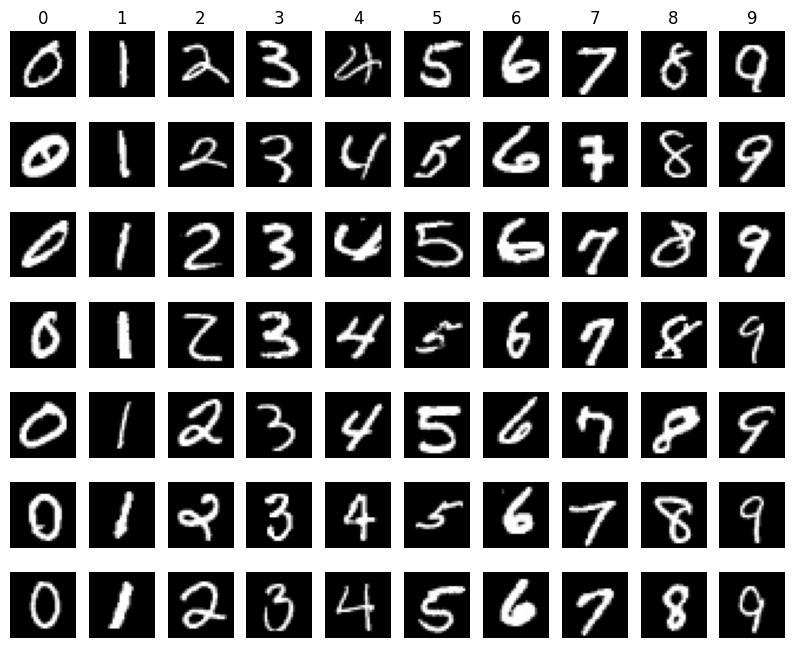

In [34]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = list(range(10))
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].reshape((28, 28)))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

Data normalization is an important step which ensures that each input parameter has a similar data distribution. This makes convergence faster while training the network.

In [35]:
X_train, X_val, X_test = get_normalized_MNIST_data(X_train, X_val, X_test)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 784)
(10000, 784)
(10000, 784)


# Train a Good Model!
Open the file `solver.py` and read through it to familiarize yourself with the API. After doing so, use a `Solver` instance to train the best fully connected model that you can on MNIST, storing your best model in the `MNIST_best_model` variable. We require you to get at least 95% accuracy on the validation set using a fully connected network.

In [41]:
MNIST_best_model = None


data = {
    'X_train': X_train,
    'y_train': y_train.astype(int),
    'X_val': X_val,
    'y_val': y_val.astype(int),
    'X_test': X_test,
    'y_test': y_test.astype(int)
    }

model = FullyConnectedNet(category="classification",
                          hidden_dims=[100,100,100],normalization=[True,True,True],reg=0,
                            # TODO
                                dtype=np.float64
)
solver = Solver(model, data,
                update_rule=sgd_momentum,
                optim_config={
                  'learning_rate': 1e-3,
                },
                lr_decay=0.95,
                num_epochs=5, batch_size=200,
                print_every=500)
solver.train()

MNIST_solver = solver
MNIST_best_model = model

(Iteration 1 / 1250) loss: 2.300511
(Epoch 0 / 5) train acc: 0.110000; val_acc: 0.121800
(Epoch 1 / 5) train acc: 0.933000; val_acc: 0.936200
(Epoch 2 / 5) train acc: 0.958000; val_acc: 0.955100
(Iteration 501 / 1250) loss: 0.144532
(Epoch 3 / 5) train acc: 0.974000; val_acc: 0.963900
(Epoch 4 / 5) train acc: 0.977000; val_acc: 0.967900
(Iteration 1001 / 1250) loss: 0.088990
(Epoch 5 / 5) train acc: 0.975000; val_acc: 0.969400


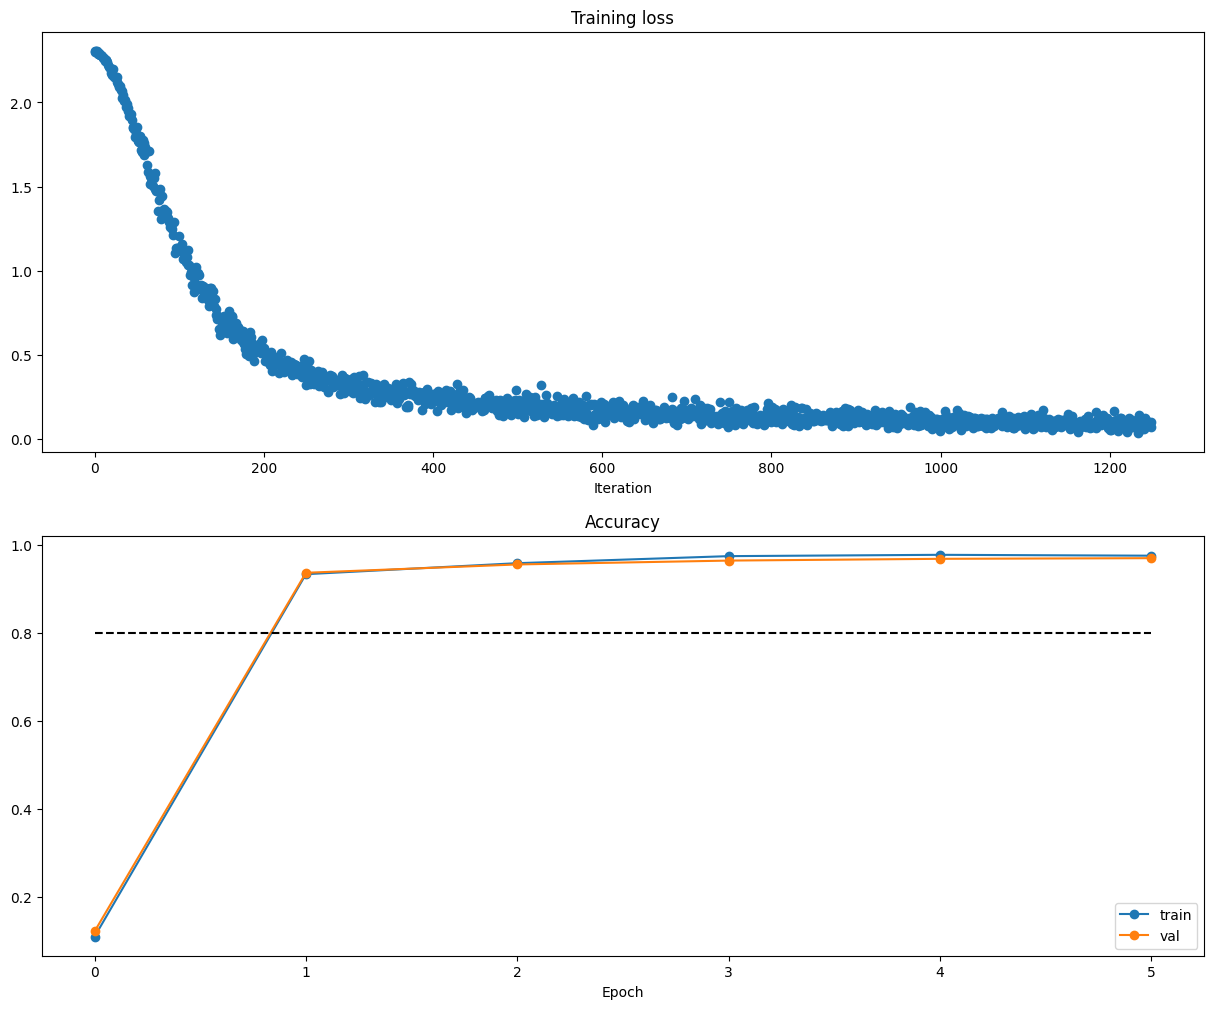

In [42]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(MNIST_solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(MNIST_solver.train_acc_history, '-o', label='train')
plt.plot(MNIST_solver.val_acc_history, '-o', label='val')
plt.plot([0.8] * len(MNIST_solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

# Test Your Model!
Run your best model on the validation and test sets. You should achieve at least 95% accuracy on the validation set.

In [43]:
y_test_pred = np.argmax(MNIST_best_model.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(MNIST_best_model.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Validation set accuracy:  0.9694
Test set accuracy:  0.9691


# California housing dataset
This is a dataset obtained from the [StatLib repository](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html). The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.

In [44]:
california_housing = fetch_california_housing(as_frame=True)
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [45]:
X_train, y_train, X_val, y_val, X_test, y_test = get_california_housing_data()
print('Train data shape: ', X_train.shape)
print('Train target values shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation target values shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test target values shape: ', y_test.shape)

Train data shape:  (15640, 8)
Train target values shape:  (15640,)
Validation data shape:  (2500, 8)
Validation target values shape:  (2500,)
Test data shape:  (2500, 8)
Test target values shape:  (2500,)


In [46]:
X_train, X_val, X_test = get_california_housing_normalized__data(X_train, X_val, X_test)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(15640, 8)
(2500, 8)
(2500, 8)


# Train a Good Model!
Train the best fully connected model that you can on california housing, storing your best model in the `california_housing_best_model` variable.

In [50]:
california_housing_best_model = None



data = {
    'X_train': X_train,
    'y_train': y_train.astype(int),
    'X_val': X_val,
    'y_val': y_val.astype(int),
    'X_test': X_test,
    'y_test': y_test.astype(int)
    }

model = FullyConnectedNet(category="regression", hidden_dims=[10,20,10],
                          normalization=[True,False,False],
                          input_dim=8,output_dim=1,reg=0,
    # TODO
    dtype=np.float64
)


solver = Solver(model, data,
                update_rule=sgd_momentum,
                optim_config={
                  'learning_rate': 1e-3,

                },
                lr_decay=0.95,
                num_epochs=10, batch_size=100,
                print_every=500)
solver.train()

california_housing_solver = solver
california_housing_best_model = model

(Iteration 1 / 1560) loss: 440.998219
(Epoch 0 / 10) train RMS error: 19.038253; val RMS error: 26.082893
(Epoch 1 / 10) train RMS error: 12.329784; val RMS error: 15.416100
(Epoch 2 / 10) train RMS error: 11.738283; val RMS error: 15.313950
(Epoch 3 / 10) train RMS error: 12.623330; val RMS error: 15.364946
(Iteration 501 / 1560) loss: 144.994599
(Epoch 4 / 10) train RMS error: 11.983821; val RMS error: 15.271285
(Epoch 5 / 10) train RMS error: 12.343877; val RMS error: 15.239240
(Epoch 6 / 10) train RMS error: 12.751569; val RMS error: 15.293583
(Iteration 1001 / 1560) loss: 138.934921
(Epoch 7 / 10) train RMS error: 11.721852; val RMS error: 15.310681
(Epoch 8 / 10) train RMS error: 12.635744; val RMS error: 15.343034
(Epoch 9 / 10) train RMS error: 12.409398; val RMS error: 15.269853
(Iteration 1501 / 1560) loss: 103.042230
(Epoch 10 / 10) train RMS error: 12.434809; val RMS error: 15.243993


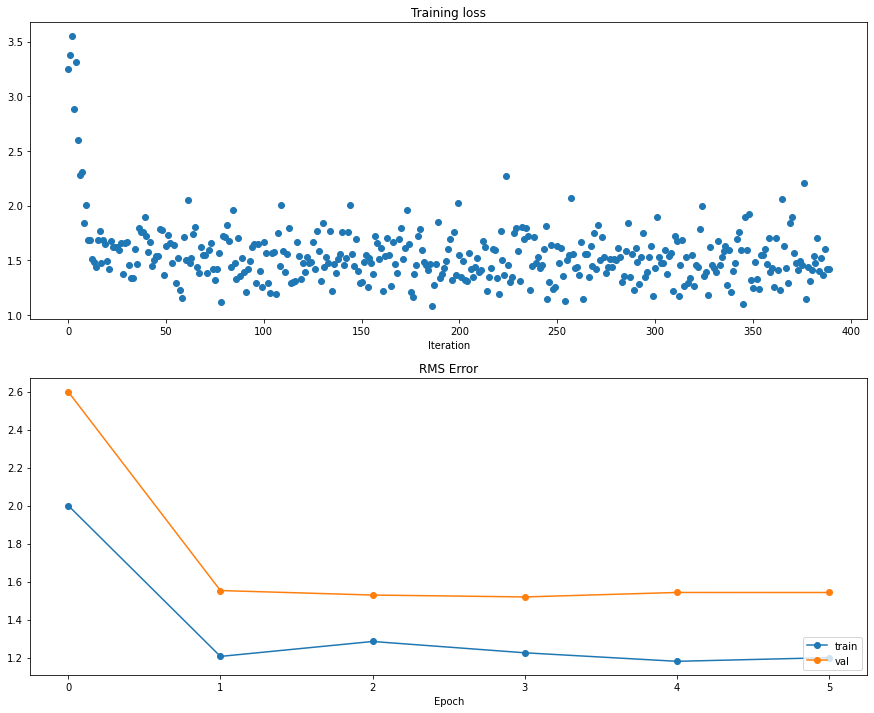

In [ ]:
# Run this cell to visualize training loss and train / val RMS error

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(california_housing_solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('RMS Error')
plt.plot(california_housing_solver.train_acc_history, '-o', label='train')
plt.plot(california_housing_solver.val_acc_history, '-o', label='val')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()